In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

%store -r close
data = close

In [2]:
# Calculating the short-window moving average
short_rolling = data.rolling(window=20).mean()
short_rolling.head()

Symbols,AAPL,MSFT,^GSPC,TSLA
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN


In [3]:
# Calculating the short-window moving average
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()

Symbols,AAPL,MSFT,^GSPC,TSLA
2020-06-08,293.333200,170.9687,2945.047986,701.793600
2020-06-09,293.607400,171.2017,2943.911885,705.728300
2020-06-10,293.958800,171.5131,2942.595784,710.283201
2020-06-11,294.125500,171.7086,2939.361384,714.289601
2020-06-12,294.330399,171.9356,2936.819785,717.994201


In [4]:
# Relative returns
returns = data.pct_change(1)
returns.head()

Symbols,AAPL,MSFT,^GSPC,TSLA
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.009196,-0.018278,-0.042041
2015-01-06,0.000094,-0.014677,-0.008893,0.005664
2015-01-07,0.014022,0.012705,0.011630,-0.001562


In [5]:
returns.tail()

Symbols,AAPL,MSFT,^GSPC,TSLA
2020-06-08,0.005912,0.006197,0.012042,0.072556
2020-06-09,0.031578,0.007645,-0.007799,-0.009738
2020-06-10,0.025728,0.037092,-0.005313,0.089702
2020-06-11,-0.048010,-0.053698,-0.058944,-0.050934
2020-06-12,0.008634,0.007892,0.013061,-0.038609


In [6]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
log_returns = np.log(data).diff()
log_returns.head()

Symbols,AAPL,MSFT,^GSPC,TSLA
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.028576,-0.009238,-0.018447,-0.042950
2015-01-06,0.000094,-0.014786,-0.008933,0.005648
2015-01-07,0.013925,0.012625,0.011563,-0.001563


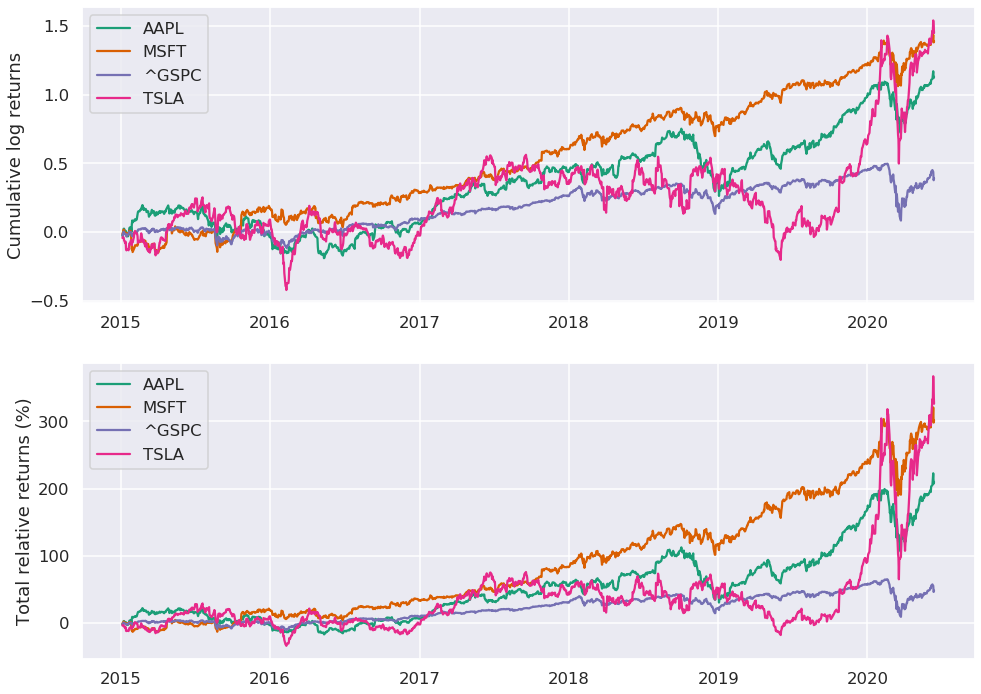

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

In [8]:
# Last day returns. Make this a column vector
r_t = log_returns.tail(1).transpose()
r_t

,2020-06-12
Symbols,
AAPL,0.008596
MSFT,0.007861
^GSPC,0.012976
TSLA,-0.039374


In [9]:
# Weights (fraction of capital that we invest in the shares)
weights_vector = pd.DataFrame(1 / 4, index=r_t.index, columns=r_t.columns)
weights_vector

,2020-06-12
Symbols,
AAPL,0.25
MSFT,0.25
^GSPC,0.25
TSLA,0.25


In [10]:
# Total log_return for the portfolio is:
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return

,2020-06-12
2020-06-12,-0.002485


In [11]:
weights_matrix = pd.DataFrame(1 / 4, index=data.index, columns=data.columns)
weights_matrix.tail()

Symbols,AAPL,MSFT,^GSPC,TSLA
2020-06-08,0.25,0.25,0.25,0.25
2020-06-09,0.25,0.25,0.25,0.25
2020-06-10,0.25,0.25,0.25,0.25
2020-06-11,0.25,0.25,0.25,0.25
2020-06-12,0.25,0.25,0.25,0.25


In [12]:
# Initially the two matrices are multiplied. Note that we are only interested in the diagonal, 
# which is where the dates in the row-index and the column-index match.
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.head().iloc[:, 0:5]

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07
2015-01-01,NaN,NaN,-0.024803,-0.004494,0.009137
2015-01-02,NaN,NaN,-0.024803,-0.004494,0.009137
2015-01-05,NaN,NaN,-0.024803,-0.004494,0.009137
2015-01-06,NaN,NaN,-0.024803,-0.004494,0.009137
2015-01-07,NaN,NaN,-0.024803,-0.004494,0.009137


In [13]:
# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

2020-06-08    0.023522
2020-06-09    0.005273
2020-06-10    0.035600
2020-06-11   -0.054356
2020-06-12   -0.002485
Freq: B, dtype: float64

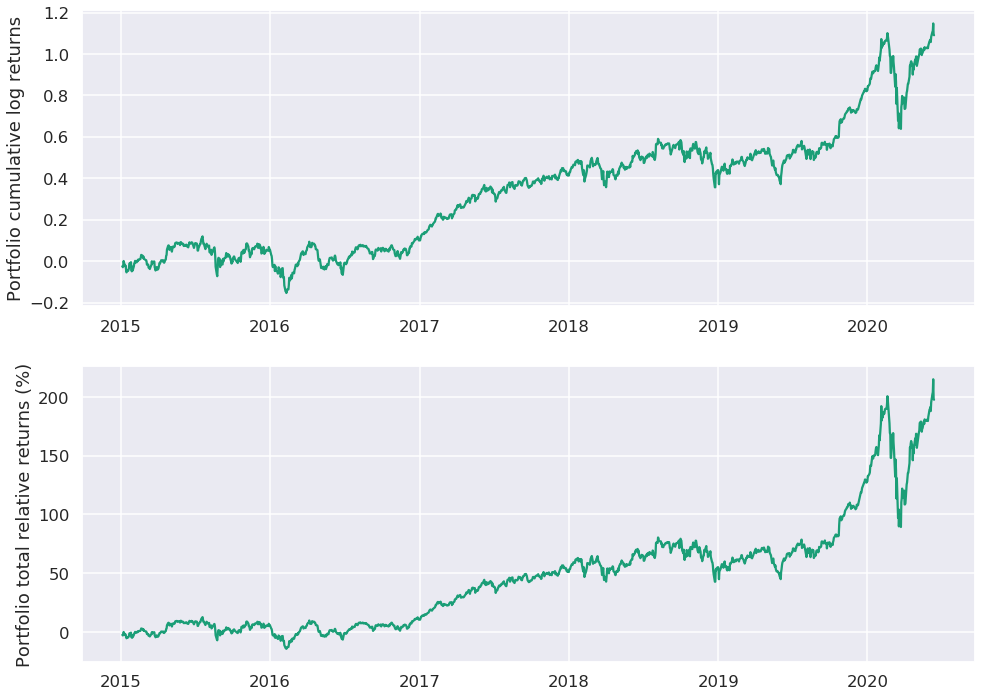

In [14]:
# Here we calculate the relative returns (what we are actually interested in!)
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

ax1.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax1.set_ylabel('Portfolio cumulative log returns')

ax2.plot(total_relative_returns.index, 100 * total_relative_returns)
ax2.set_ylabel('Portfolio total relative returns (%)')

plt.show()

In [15]:
# Calculating the time-related parameters of the simulation
days_per_year = 52 * 5
total_days_in_simulation = data.shape[0]
number_of_years = total_days_in_simulation / days_per_year

# The last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns[-1]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

Total portfolio return is: 197.57%
Average yearly return is: 22.06%
